# Retail Demand Forecasting Analysis

This notebook contains the analysis for the ML Zoomcamp 2024 Competition focusing on retail demand forecasting.

## Data Preparation

In this section, we will:
1. Load and examine the raw data
2. Check for missing values
3. Analyze data types and basic statistics
4. Handle any data format issues

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option("display.max_columns", None)

## Data Loading

Loading all CSV files from the competition dataset:

In [19]:
# Load all CSV files
actual_matrix = pd.read_csv('../data/actual_matrix.csv', index_col=0)
catalog = pd.read_csv('../data/catalog.csv', index_col=0)
discounts = pd.read_csv('../data/discounts_history.csv', index_col=0)
markdowns = pd.read_csv('../data/markdowns.csv', index_col=0)
online = pd.read_csv('../data/online.csv', index_col=0)
price_history = pd.read_csv('../data/price_history.csv', index_col=0)
sales = pd.read_csv('../data/sales.csv', index_col=0)
stores = pd.read_csv('../data/stores.csv', index_col=0)
test = pd.read_csv('../data/test.csv', index_col=0)

In [20]:
# Display basic information about each dataset
for name, df in {
    'Actual Matrix': actual_matrix,
    'Catalog': catalog,
    'Discounts History': discounts,
    'Markdowns': markdowns,
    'Online': online,
    'Price History': price_history,
    'Sales': sales,
    'Stores': stores,
    'Test': test
}.items():
    print(f"\n{name} Dataset:")
    print(f"Shape: {df.shape}")
    print("\nColumns:")
    print(df.columns.tolist())
    print("\nSample data:")
    print(df.head(2))
    print("\nData Info:")
    df.info()


Actual Matrix Dataset:
Shape: (35202, 3)

Columns:
['item_id', 'date', 'store_id']

Sample data:
        item_id        date  store_id
0  c578da8e8841  2019-10-17         1
1  4dd2b686802c  2019-10-17         1

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 35202 entries, 0 to 35201
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   35202 non-null  object
 1   date      35202 non-null  object
 2   store_id  35202 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB

Catalog Dataset:
Shape: (219810, 8)

Columns:
['item_id', 'dept_name', 'class_name', 'subclass_name', 'item_type', 'weight_volume', 'weight_netto', 'fatness']

Sample data:
        item_id                 dept_name          class_name  \
0  da17e2d5feda  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ  БУМАЖНАЯ ПРОДУКЦИЯ   
1  614de2b96018  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   

      subclass_name item_type  weight_volume  weight_netto  fat

## Initial Data Analysis

Key aspects to analyze:
1. Data completeness (missing values)
2. Data types and potential type conversions
3. Value distributions
4. Temporal patterns (for time-series data)
5. Relationships between different datasets

In [21]:
# Analyze missing values in each dataset
print("Missing Values Analysis:\n")

for name, df in {
    'Actual Matrix': actual_matrix,
    'Catalog': catalog,
    'Discounts History': discounts,
    'Markdowns': markdowns,
    'Online': online,
    'Price History': price_history,
    'Sales': sales,
    'Stores': stores,
    'Test': test
}.items():
    missing = df.isnull().sum()
    if missing.any():
        print(f"\n{name} Dataset Missing Values:")
        print(missing[missing > 0])
    else:
        print(f"\n{name} Dataset: No missing values")

Missing Values Analysis:


Actual Matrix Dataset: No missing values

Catalog Dataset Missing Values:
item_type        176224
weight_volume    136858
weight_netto     170853
fatness          212598
dtype: int64

Discounts History Dataset Missing Values:
promo_type_code    317846
dtype: int64

Markdowns Dataset: No missing values

Online Dataset: No missing values

Price History Dataset: No missing values

Sales Dataset: No missing values

Stores Dataset: No missing values

Test Dataset: No missing values


## Data Visualization

Let's create some basic visualizations to understand our data better:

In [23]:
sales.head()

,date,item_id,quantity,price_base,sum_total,store_id
0,2023-08-04,293375605257,1.000,47.86,47.86,1
1,2023-08-04,a66fdf2c0ae7,3.000,49.60,148.80,1
2,2023-08-04,daa46ef49b7a,0.822,379.00,311.54,1
3,2023-08-04,a3b49c1bf758,1.000,129.00,129.00,1
4,2023-08-04,ab611c5cef62,7.000,79.90,559.30,1


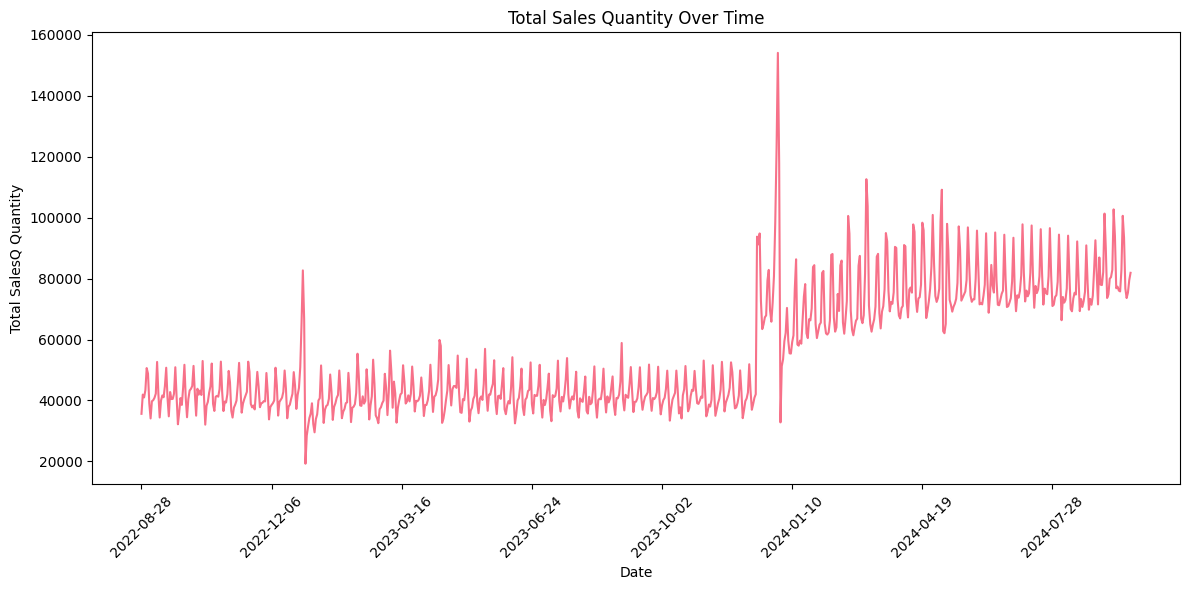

In [27]:
# 2. Sales Overview
plt.figure(figsize=(12, 6))
sales.groupby('date')['quantity'].sum().plot(kind='line')
plt.title('Total Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total SalesQ Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Cleaning

In this section, we will:
1. Remove or handle outliers
2. Handle missing values
3. Format dates and categorical variables
4. Create any necessary derived features